# 决策树的构造

## 创建数据集

In [26]:
def createDataSet():
    dataSet = [[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,1,'no']]
    labels = ['no surfacing','flippers']
    return dataSet,labels

In [27]:
myDat,labels = createDataSet()

In [28]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [29]:
labels

['no surfacing', 'flippers']

## 计算给定数据集的香农熵

### 熵公式

$$ H = -\sum_{i=1}^{n}p(x_{i})log_{2}p(x_{i}) $$

### 代码实现

In [30]:

from math import log

def calcShannonEnt(dataSet):
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    numEntries = len(dataSet)
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)
    return shannonEnt,labelCounts

In [31]:
shannonEnt,labelCounts = calcShannonEnt(myDat)

In [32]:
shannonEnt

0.9709505944546686

In [33]:
labelCounts

{'no': 3, 'yes': 2}

In [34]:
labelCounts.keys()

['yes', 'no']

## 划分数据集

### 按照给定特征划分数据集

In [35]:
 def splitDataSet(dataSet, axis, value):
     retDataSet = []
     for featVec in dataSet:
         if featVec[axis] == value:
             reducedFeatVec = featVec[:axis]     #chop out axis used for splitting
             reducedFeatVec.extend(featVec[axis+1:])
             retDataSet.append(reducedFeatVec)
     return retDataSet

In [36]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [37]:
splitDataSet(myDat,0,1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [38]:
splitDataSet(myDat,0,0)

[[1, 'no'], [1, 'no']]

### 选择最好的数据集划分方式

In [47]:
def chooseBestFeatureToSplit(dataSet):
     numFeatures = len(dataSet[0]) - 1      #the last column is used for the labels
     baseEntropy,labelCounts = calcShannonEnt(dataSet)
     bestInfoGain = 0.0; 
     bestFeature = -1
     for i in range(numFeatures):        #iterate over all the features
         featList = [example[i] for example in dataSet]#create a list of all the examples of this feature
         uniqueVals = set(featList)       #get a set of unique values
         newEntropy = 0.0
         for value in uniqueVals:
             subDataSet = splitDataSet(dataSet, i, value)
             prob = len(subDataSet)/float(len(dataSet))
             shannonEnt,labelCounts = calcShannonEnt(subDataSet)
             newEntropy += prob * shannonEnt
         infoGain = baseEntropy - newEntropy     #calculate the info gain; ie reduction in entropy
         if (infoGain > bestInfoGain):       #compare this to the best gain so far
             bestInfoGain = infoGain         #if better than current best, set to best
             bestFeature = i
     return bestFeature                      #returns an integer

In [48]:
chooseBestFeatureToSplit(myDat)

0

## 递归构建决策树

# 使用Matplotlib注解绘制树形图

## Matplotlib注解

In [53]:
import matplotlib.pyplot as plt
 
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
     createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
     xytext=centerPt, textcoords='axes fraction',
     va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
        
def createPlot():
     fig = plt.figure(1, facecolor='white')
     fig.clf()
     createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
     plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
     plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
     plt.show()

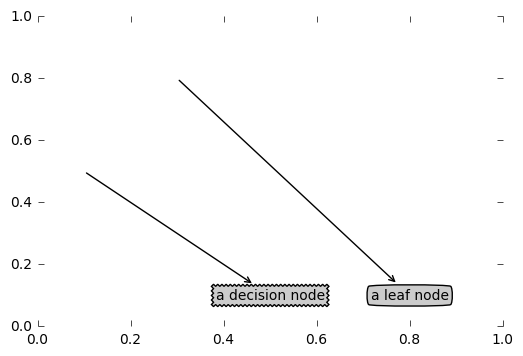

In [54]:
createPlot()

## 构造注解树

In [56]:
def getNumLeafs(myTree):
     numLeafs = 0
     firstStr = myTree.keys()[0]
     secondDict = myTree[firstStr]
     for key in secondDict.keys():
         if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
             numLeafs += getNumLeafs(secondDict[key])
         else:   numLeafs +=1
     return numLeafs
 
def getTreeDepth(myTree):
     maxDepth = 0
     firstStr = myTree.keys()[0]
     secondDict = myTree[firstStr]
     for key in secondDict.keys():
         if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
             thisDepth = 1 + getTreeDepth(secondDict[key])
         else:   thisDepth = 1
         if thisDepth > maxDepth: maxDepth = thisDepth
     return maxDepth
def retrieveTree(i):
     listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                   {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                   ]
     return listOfTrees[i]

In [57]:
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [59]:
mytree = retrieveTree(0)

In [60]:
mytree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [61]:
getNumLeafs(mytree)

3

In [62]:
getTreeDepth(mytree)

2

In [66]:
def plotMidText(cntrPt, parentPt, txtString):
     xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
     yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
     createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
     numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
     depth = getTreeDepth(myTree)
     firstStr = myTree.keys()[0]     #the text label for this node should be this
     cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
     plotMidText(cntrPt, parentPt, nodeTxt)
     plotNode(firstStr, cntrPt, parentPt, decisionNode)
     secondDict = myTree[firstStr]
     plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
     for key in secondDict.keys():
         if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
             plotTree(secondDict[key],cntrPt,str(key))        #recursion
         else:   #it's a leaf node print the leaf node
             plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
             plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
             plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
     plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict
 
def createPlot(inTree):
     fig = plt.figure(1, facecolor='white')
     fig.clf()
     axprops = dict(xticks=[], yticks=[])
     createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
     #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
     plotTree.totalW = float(getNumLeafs(inTree))
     plotTree.totalD = float(getTreeDepth(inTree))
     plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
     plotTree(inTree, (0.5,1.0), '')
     plt.show()

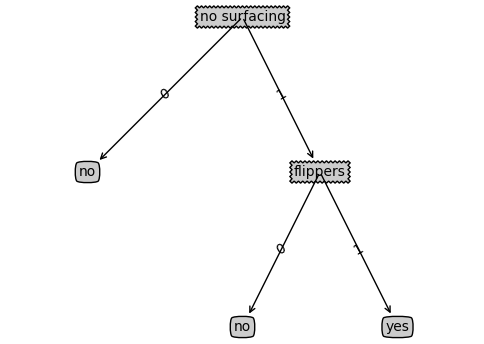

In [67]:
createPlot(mytree)

# 测试和存储分类器